Project

# Temperature Prediction

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 25)
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
data_df = pd.read_csv('temperature.csv', index_col='Date', parse_dates=True)

## Exploratory Data Analysis

In [3]:
#Splititng the Date into Year, Month and Day
data_df.reset_index(inplace=True)
data_df['Year']  = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Day']   = data_df['Date'].dt.day
data_df.set_index('Date', inplace=True)

In [4]:
print('Getting the info: ')
print(data_df.info())

Getting the info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4  

In [5]:
print('The stats of the data: ')
print(data_df.describe())

The stats of the data: 
           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min    

In [6]:
#Get rid of the last 2 rows of the data as they don't have station and date info
data_df.drop(data_df.tail(2).index, inplace=True)

In [7]:
index_present_tmax= data_df['Present_Tmax'].index[data_df['Present_Tmax'].apply(np.isnan)]
index_present_tmin= data_df['Present_Tmin'].index[data_df['Present_Tmin'].apply(np.isnan)]

index_next_tmax   = data_df['Next_Tmax'].index[data_df['Next_Tmax'].apply(np.isnan)]
index_next_tmin   = data_df['Next_Tmin'].index[data_df['Next_Tmin'].apply(np.isnan)]

index_LDAPS_RHmax = data_df['LDAPS_RHmax'].index[data_df['LDAPS_RHmax'].apply(np.isnan)]
index_LDAPS_RHmin = data_df['LDAPS_RHmin'].index[data_df['LDAPS_RHmin'].apply(np.isnan)]
index_Tmax_lapse  = data_df['LDAPS_Tmax_lapse'].index[data_df['LDAPS_Tmax_lapse'].apply(np.isnan)]
index_Tmin_lapse  = data_df['LDAPS_Tmin_lapse'].index[data_df['LDAPS_Tmin_lapse'].apply(np.isnan)]
index_LDAPS_WS    = data_df['LDAPS_WS'].index[data_df['LDAPS_WS'].apply(np.isnan)]
index_LDAPS_LH    = data_df['LDAPS_LH'].index[data_df['LDAPS_LH'].apply(np.isnan)]
index_LDAPS_CC1   = data_df['LDAPS_CC1'].index[data_df['LDAPS_CC1'].apply(np.isnan)]
index_LDAPS_CC2   = data_df['LDAPS_CC2'].index[data_df['LDAPS_CC2'].apply(np.isnan)]
index_LDAPS_CC3   = data_df['LDAPS_CC3'].index[data_df['LDAPS_CC3'].apply(np.isnan)]
index_LDAPS_CC4   = data_df['LDAPS_CC4'].index[data_df['LDAPS_CC4'].apply(np.isnan)]
index_LDAPS_PPT1  = data_df['LDAPS_PPT1'].index[data_df['LDAPS_PPT1'].apply(np.isnan)]
index_LDAPS_PPT2  = data_df['LDAPS_PPT2'].index[data_df['LDAPS_PPT2'].apply(np.isnan)]
index_LDAPS_PPT3  = data_df['LDAPS_PPT3'].index[data_df['LDAPS_PPT3'].apply(np.isnan)]
index_LDAPS_PPT4  = data_df['LDAPS_PPT4'].index[data_df['LDAPS_PPT4'].apply(np.isnan)]

In [8]:
#Checking if the null values are at the same indices
if list(index_present_tmax) == list(index_present_tmin):
    print('Lists are identical')
else: print('Unidentical lists')

if list(index_next_tmax) == list(index_next_tmin):
    print('Lists are identical')
else: print('Unidentical lists')
        
if list(index_LDAPS_RHmax)==list(index_LDAPS_RHmin)==list(index_Tmax_lapse)==list(index_Tmin_lapse)==list(index_LDAPS_WS)==list(index_LDAPS_LH)==list(index_LDAPS_CC1)==list(index_LDAPS_CC2)==list(index_LDAPS_CC3)==list(index_LDAPS_CC4)==list(index_LDAPS_PPT1)==list(index_LDAPS_PPT2)==list(index_LDAPS_PPT3)==list(index_LDAPS_PPT4):
    print('Lists are identical')
else: print('Unidentical lists')

Lists are identical
Lists are identical
Lists are identical


# Visualization

In [9]:
no_of_stations = 25
station = [[] for _ in range(no_of_stations+1)]

for i in range(1,len(station)):
    station[i] = data_df.loc[data_df['station'] == i]

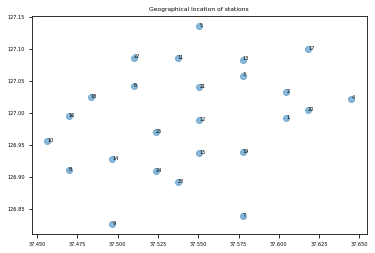

In [25]:
for i in range(1,len(station)):
    station[i] = station[i].fillna(station[i].mean())

new_data = pd.DataFrame(columns=['lat','lon'], index=range(0,25))
for i in range(0,25):
    new_data['lat'][i] = data_df['lat'][i]
    new_data['lon'][i] = data_df['lon'][i]
    
fig, ax = plt.subplots()
ax.scatter(new_data['lat'],new_data['lon'], alpha=0.5)
plt.title('Geographical location of stations')

labels = [i for i in range(1,len(station))]
for i, txt in enumerate(labels):
    ax.annotate(txt, (new_data['lat'][i],new_data['lon'][i]))

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


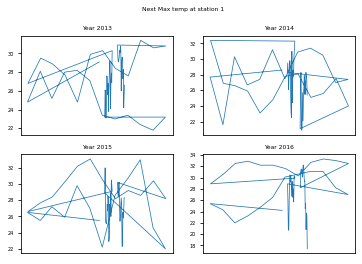

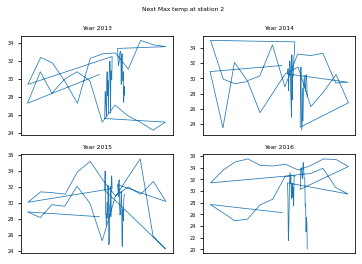

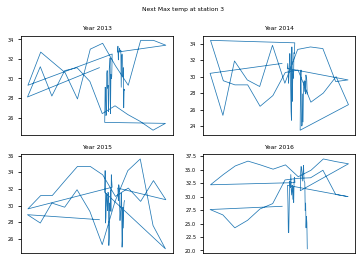

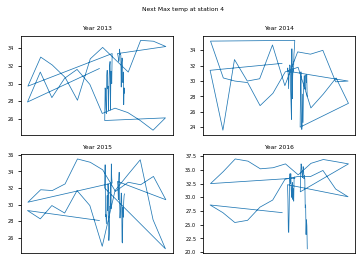

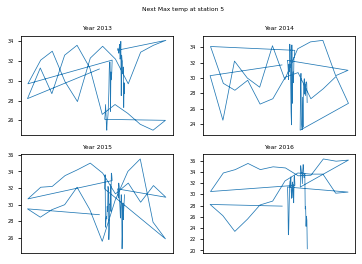

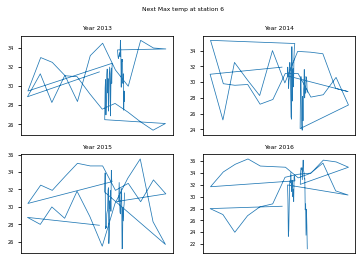

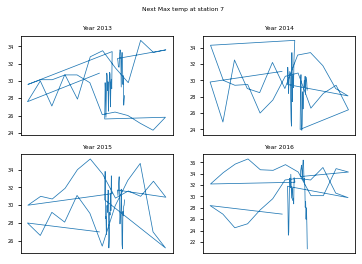

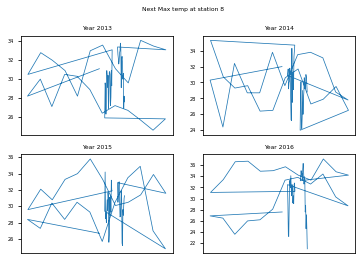

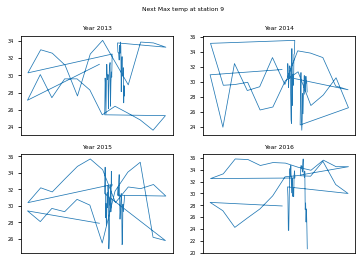

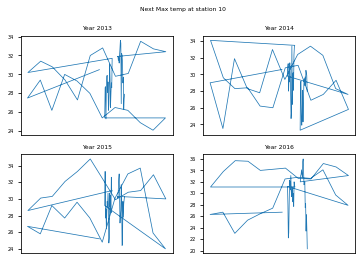

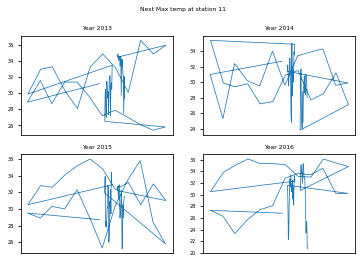

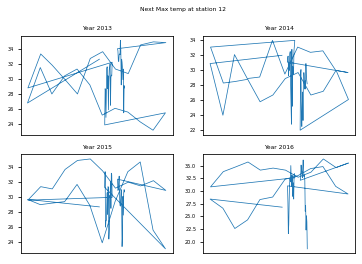

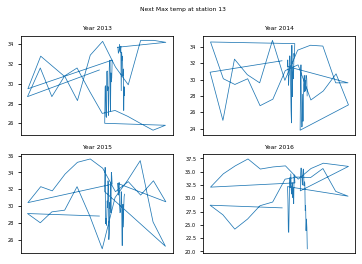

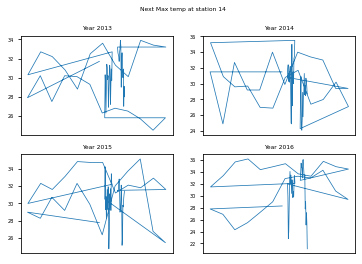

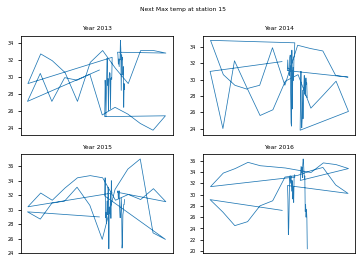

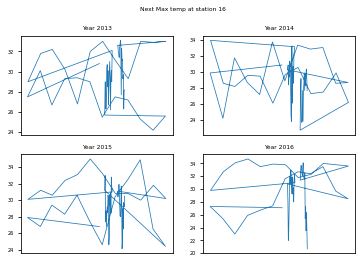

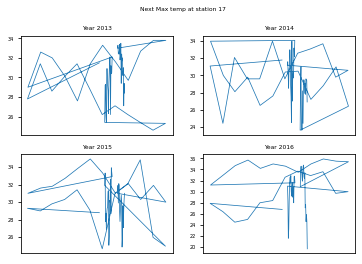

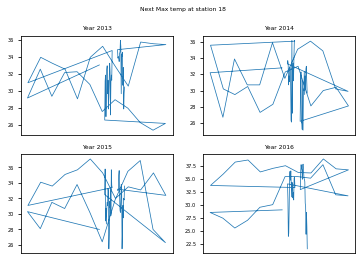

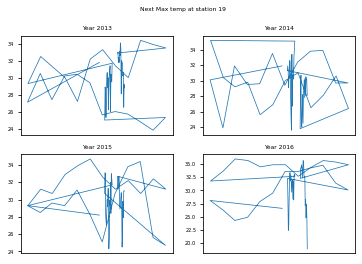

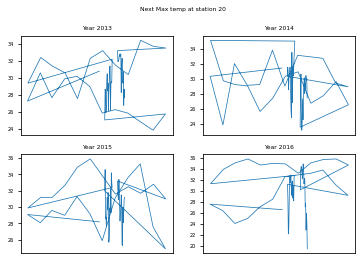

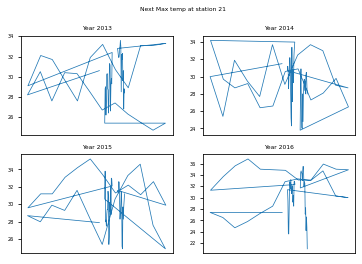

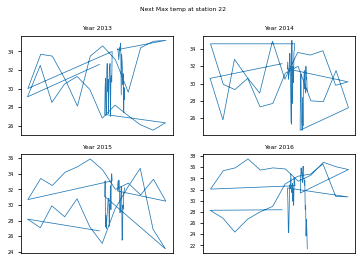

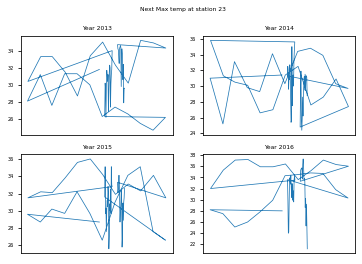

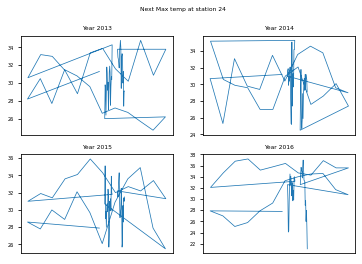

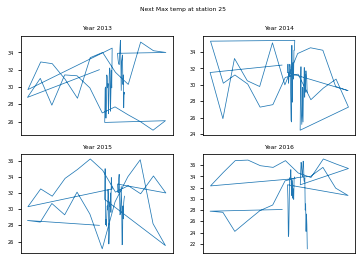

In [26]:
for i in range(1,len(station)):

    plt.rcParams.update({'font.size': 5})
    ncols = 2
    nrows = 2
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Next Max temp at station {}'.format(i))
    years = [2013,2014,2015,2016]
    
    for ax, j in zip(axes.flatten(), years):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Year {}'.format(j))
    
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)        


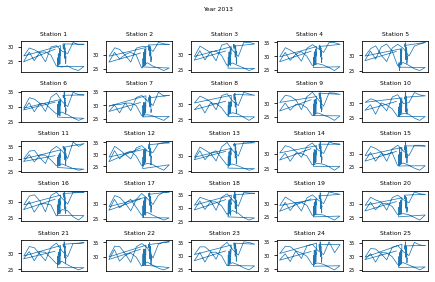

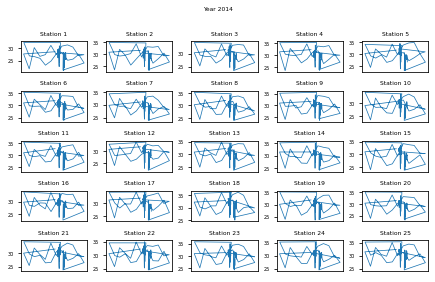

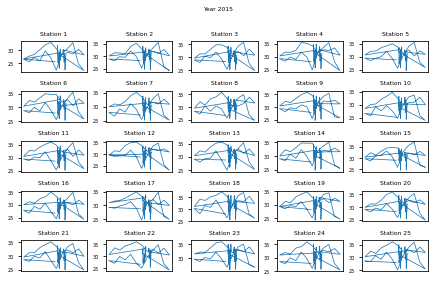

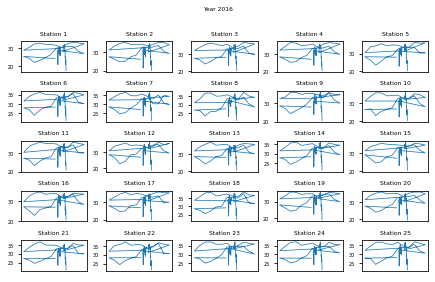

In [27]:
#This shows the variation of Present Max temp at all stations in a particular year
years = [2013,2014,2015,2016]
for j in years:
    
    #plt.rcParams.update({'font.size:5'})
    ncols = 5
    nrows = 5
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Year {}'.format(j))
    i = range(1,26)
    
    for ax, i in zip(axes.flatten(), i):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Station {}'.format(i))
        
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [28]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#K-Fold cross validation
from sklearn.model_selection import cross_val_score

In [29]:
def get_train_valid(station):
    
    train = station.loc[station['Year']!=2017] 
    valid = station.loc[station['Year']==2017]
    
    train = train.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    valid = valid.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    
    return train, valid

In [16]:
def scale(X_train, X_test):
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    
    return X_train, X_test

In [17]:
def backElimination(X, Y_train, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()

    results_as_html = results_summary.tables[1].as_html()
    dfs = pd.read_html(results_as_html, header=0, index_col=0)[0]

    p_value =  dfs.iloc[:, 3]
    p_value_arr = p_value.tolist()
    pop_item = False
    maxpos  = p_value_arr.index(max(p_value_arr))
    if(p_value_arr[maxpos]>sl):
        get_arr.append(arr[maxpos])
        arr.pop(maxpos)
        pop_item = True
    
    if(pop_item): return backElimination(X, Y_train, arr, get_arr)
    else: 
        get_arr.sort()        
        return results_summary

In [18]:
def plot(Y_pred_Tmax, Y_pred_Tmin, valid, iter_no):
    
    Y_pred_Tmax = pd.DataFrame(Y_pred_Tmax)
    Y_pred_Tmin = pd.DataFrame(Y_pred_Tmin)
    
    Y_pred_Tmax.columns = ['Predicted Next_Tmax']
    Y_pred_Tmin.columns = ['Predicted Next_Tmin']
    
    Y_pred = pd.concat([Y_pred_Tmax, Y_pred_Tmin], axis=1, join='inner')
    test = valid
    test.index = [k for k in range(0,len(test))]    
    
    #plotting the results
    nrows = 2
    ncols = 1
    fig, (ax1,ax2) = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Station {}'.format(iter_no))
    
    ax1.plot(test['Next_Tmax'], label='True value')
    ax1.plot(Y_pred['Predicted Next_Tmax'], label='Predicted')
    ax1.title.set_text('Tmax - True v/s Predicted')
    ax1.set_xticks([])
    ax1.tick_params(axis='y', labelsize=5)
    ax1.legend(loc='upper right')
    
    ax2.plot(test['Next_Tmin'], label='True value')
    ax2.plot(Y_pred['Predicted Next_Tmin'], label='Predicted')
    ax2.title.set_text('Tmin - True v/s Predicted')
    ax2.set_xticks([])
    ax2.tick_params(axis='y', labelsize=5)
    ax2.legend(loc='upper right')
    
    #fig.tight_layout(rect=[0, 0.03, 1, 0.95])   

In [19]:
def build_model(X_train, Y_train, X_test, sl):
    
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    
    Y_pred  = regressor.predict(X_test)
    
    accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)
    acc_mean = accuracies.mean()
    acc_std  = accuracies.std()
    
    kfold = {'acc_mean':acc_mean, 'acc_std':acc_std}
    
    X_train_mul = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)
    arr = []
    get_arr = []
    for i in range(0, X_train.shape[1]):
        arr.append(i)
        
    summary = backElimination(X_train_mul, Y_train, arr, get_arr)

    acc = round(regressor.score(X_train, Y_train)*100, 2)
    
    return summary, acc, Y_pred    

In [20]:
def run(station, sl, iter_no):
    
    train, valid = get_train_valid(station)
    
    X_train = train.iloc[:, :-2].values
    Y_train_Tmax = train.iloc[:, [-2]].values
    Y_train_Tmin = train.iloc[:, [-1]].values
    
    X_test = valid.iloc[:, :-2].values
    Y_test_Tmax = valid.iloc[:, [-2]].values
    Y_test_Tmin = valid.iloc[:, [-1]].values
    
    scaled_X_trian, scaled_X_test = scale(X_train, X_test) #Returns the scaled values of X_train and X_test
    
    summary_max, acc_max, Y_pred_Tmax = build_model(scaled_X_trian, Y_train_Tmax, scaled_X_test, sl)
    summary_min, acc_min, Y_pred_Tmin = build_model(scaled_X_trian, Y_train_Tmin, scaled_X_test, sl)
    
    summ = [summary_max, summary_min]
    a  = [acc_max, acc_min]
    
    #Plotting True v's Predicted values
    plot(Y_pred_Tmax, Y_pred_Tmin, valid, iter_no)
    
    return summ, a

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


Accuracy at individual station is: 
    Station  Next_Tmax  Next_Tmin
0         1      80.43      86.29
1         2      80.46      86.57
2         3      80.35      85.83
3         4      80.39      86.31
4         5      77.58      84.36
5         6      79.52      84.40
6         7      77.71      80.47
7         8      81.91      84.56
8         9      77.99      82.39
9        10      79.96      84.25
10       11      78.39      83.62
11       12      78.19      85.31
12       13      79.26      87.29
13       14      79.42      81.97
14       15      75.87      85.10
15       16      78.66      83.81
16       17      79.13      86.35
17       18      78.45      83.54
18       19      78.83      85.20
19       20      81.20      84.88
20       21      80.64      84.34
21       22      78.59      83.72
22       23      80.60      81.71
23       24      80.19      81.96
24       25      80.82      84.28


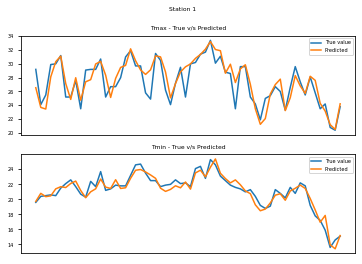

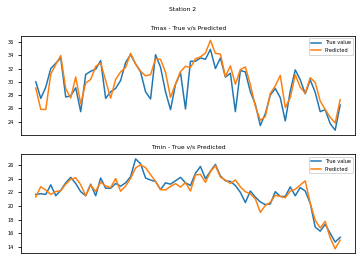

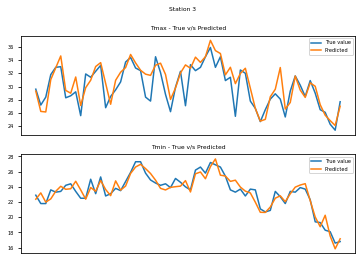

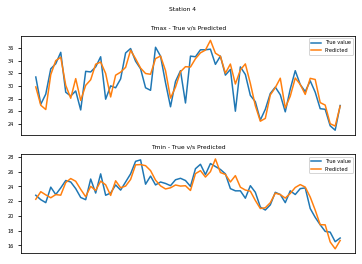

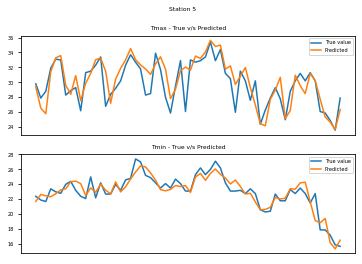

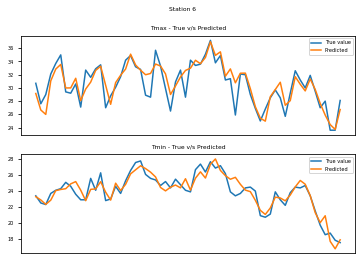

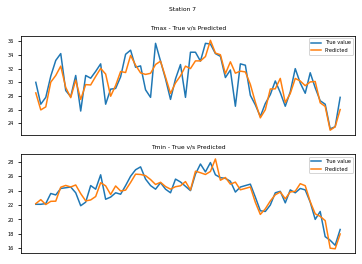

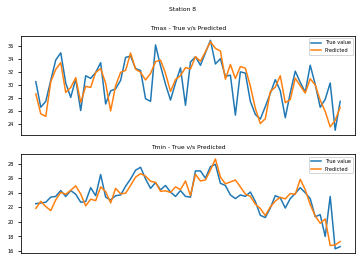

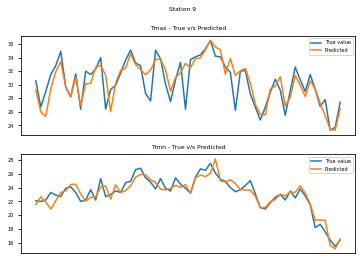

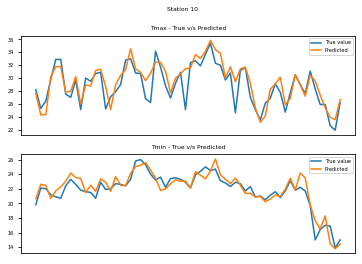

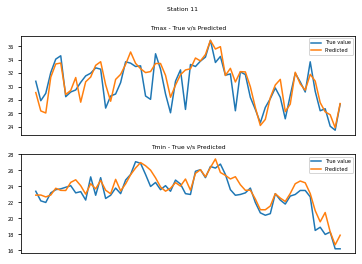

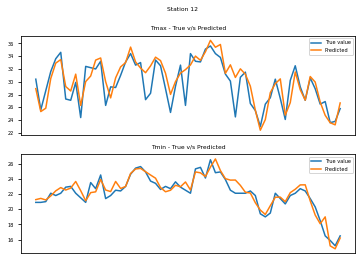

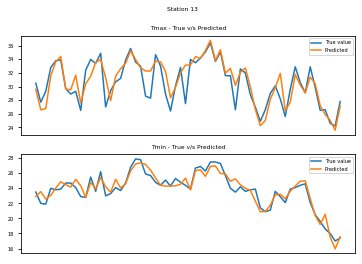

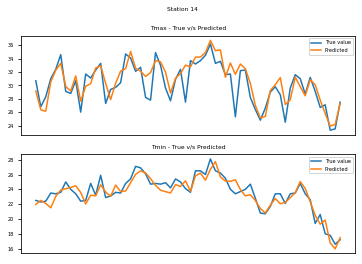

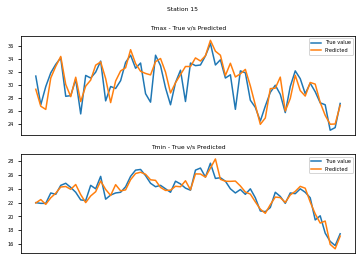

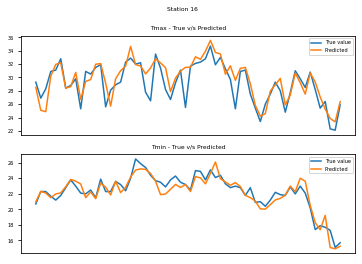

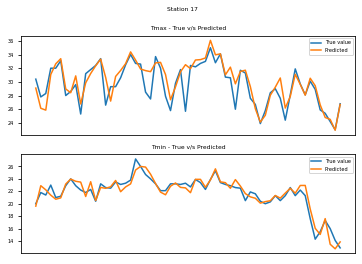

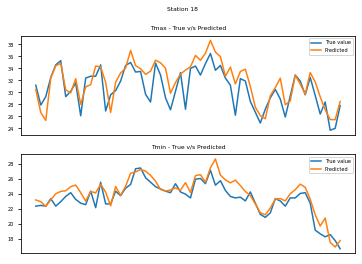

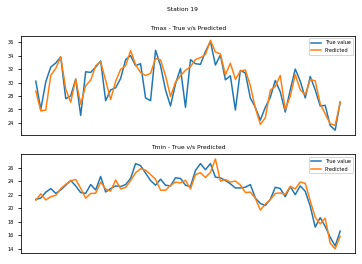

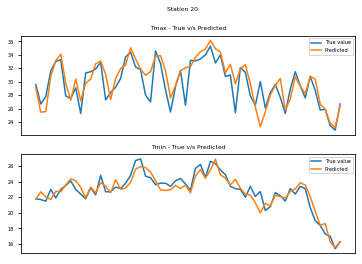

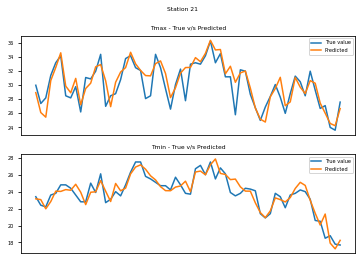

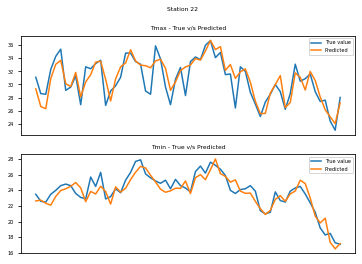

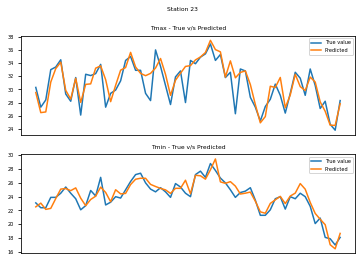

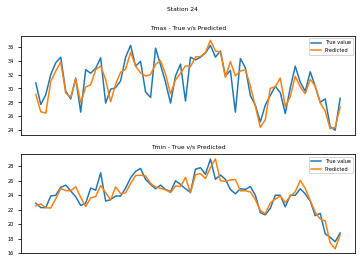

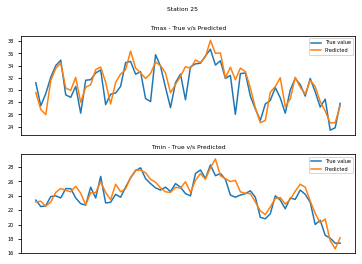

In [23]:
if __name__ == '__main__':
    
    data_df = pd.read_csv('temperature.csv', index_col = 'Date', parse_dates=True)
    
    data_df.reset_index(inplace=True)
    data_df['Year']  = data_df['Date'].dt.year
    data_df['Month'] = data_df['Date'].dt.month
    data_df['Day']   = data_df['Date'].dt.day
    
    #There are 25 stations, dividing data into respective stations
    station_info = [[] for _ in range(26)]
    
    for i in range(1,26):
        station_info[i] = data_df.loc[data_df['station'] == i]    
    
    #All the columns are float64 and since the std. deviaiton is less and the total no. of
    #missing values are les, filling all the nan values with the respective column avg.
    for i in range(1,26):
        station_info[i] = station_info[i].fillna(station_info[i].mean())
        #station[i].set_index('Date', inplace=True)
        
    targets  = ['Next_Tmax','Next_Tmin']
    features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin','LDAPS_Tmax_lapse',
                'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
                'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
    
    acc = [i for i in range(0,len(station_info))] #To store accuracy values
    summary = [j for j in range(0,len(station_info))] #To store summary of the model
    sl = 0.05
    
    for iter_no in range(1,len(station_info)):  
        
        summary[iter_no], acc[iter_no] = run(station_info[iter_no], sl, iter_no)
    
    #Converting summary list to DataFrame object     
    summary[0] = [0,0]
    summary_df = pd.DataFrame(summary, columns=['Next_Tmax','Next_Tmin'])
    summary_df['Station'] = summary_df.index
    
    cols = summary_df.columns.to_list()
    cols = cols[-1:] + cols[:-1]
    
    summary_df = summary_df[cols]
    summary_df.drop(summary_df.head(1).index, inplace=True)
    summary_df.index = range(0,len(summary_df))
    
    #Converting accuracy list to DataFrame object  
    acc[0] = [0,0]
    acc_df = pd.DataFrame(acc, columns=['Next_Tmax','Next_Tmin'])
    acc_df['Station'] = acc_df.index
    
    cols = acc_df.columns.to_list()
    cols = cols[-1:] + cols[:-1]
    
    acc_df = acc_df[cols]
    acc_df.drop(acc_df.head(1).index, inplace=True)
    acc_df.index = range(0,len(acc_df))
    
    #Accuracy of predictions
    print('Accuracy at individual station is: ')
    print(acc_df)

In [22]:
print('Avg accuracy for Next_Tmax is: {}'.format(acc_df['Next_Tmax'].mean()))
print('Avg accuracy for Next_Tmin is: {}'.format(acc_df['Next_Tmin'].mean()))

Avg accuracy for Next_Tmax is: 79.38159999999999
Avg accuracy for Next_Tmin is: 84.3404
